##**Gathering theoritical concepts behind TIME SERIES ANALYSIS**

###***Stationarity***
Stationarity of the time series means that the statistical properties of the process generating the time series like mean, variance should stay constant over time. In simple words it means that the way in which time series change remains constant over time.


---
###***Techniques to check for stationarity:-***


*   Rolling Statistics
*   ADCF test (Augmented Dickey Fuller Test)




#**Installing important libraries for time series analysis. In this case I have made use of the Facebook's Prophet Library.**

In [1]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 1.2 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 834 kB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6639192 sha256=d4a4bdbdc4e06163d1ba9d18e2e08899895172d9a74ff5058ee20f992d7f0796
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

#**Importing necessary modules and reading in the dataset**

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from datetime import date
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from dateutil.relativedelta import relativedelta
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from fbprophet import Prophet

In [3]:
df=pd.read_csv('/content/road_data.csv')
df

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1006,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1007,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1008,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


# **Combining the Dataset and plotting the features in order to check the trend in the features.**  

In [4]:
df_combined=df.iloc[:,1:]
df_combined['year'].astype(int)
df_combined

,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1006,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1007,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1008,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [5]:
df_combined['section']=0
first_column = df_combined.pop('section')
df_combined.insert(1, 'section', first_column)
ind=0
mark=1
for i in range(len(df_combined)+1):
  if ind==10:
    df_combined['section'][i]=mark
    mark+=1
    ind=0
  df_combined['section'][i]=mark
  ind+=1
df_combined.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year,section,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,2,1,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,3,1,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,4,1,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,5,1,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80
5,6,1,324.0,225.0,17.2,0.0,4,114,6630,1500,0.0,24.9,0.0,7,1.81
6,7,1,324.0,130.0,18.4,0.0,3,103,6700,1540,0.9,25.2,0.0,7,1.86
7,8,1,324.0,100.6,19.0,0.0,2,114,6740,1590,0.9,52.8,0.0,8,1.89
8,9,1,324.0,176.5,19.0,0.0,3,108,7175,1787,3.4,60.5,57.0,8,1.92
9,10,1,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.96


In [6]:
ind=0
for i in df_combined['year']:
  df_combined.at[ind,'year'] = date.today() + timedelta(days=i)
  ind+=1
df_combined['year']=pd.to_datetime(df_combined['year'])

In [7]:
df_combined.head(10)

,year,section,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,2022-09-15,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,2022-09-16,1,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,2022-09-17,1,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,2022-09-18,1,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,2022-09-19,1,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80
5,2022-09-20,1,324.0,225.0,17.2,0.0,4,114,6630,1500,0.0,24.9,0.0,7,1.81
6,2022-09-21,1,324.0,130.0,18.4,0.0,3,103,6700,1540,0.9,25.2,0.0,7,1.86
7,2022-09-22,1,324.0,100.6,19.0,0.0,2,114,6740,1590,0.9,52.8,0.0,8,1.89
8,2022-09-23,1,324.0,176.5,19.0,0.0,3,108,7175,1787,3.4,60.5,57.0,8,1.92
9,2022-09-24,1,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.96


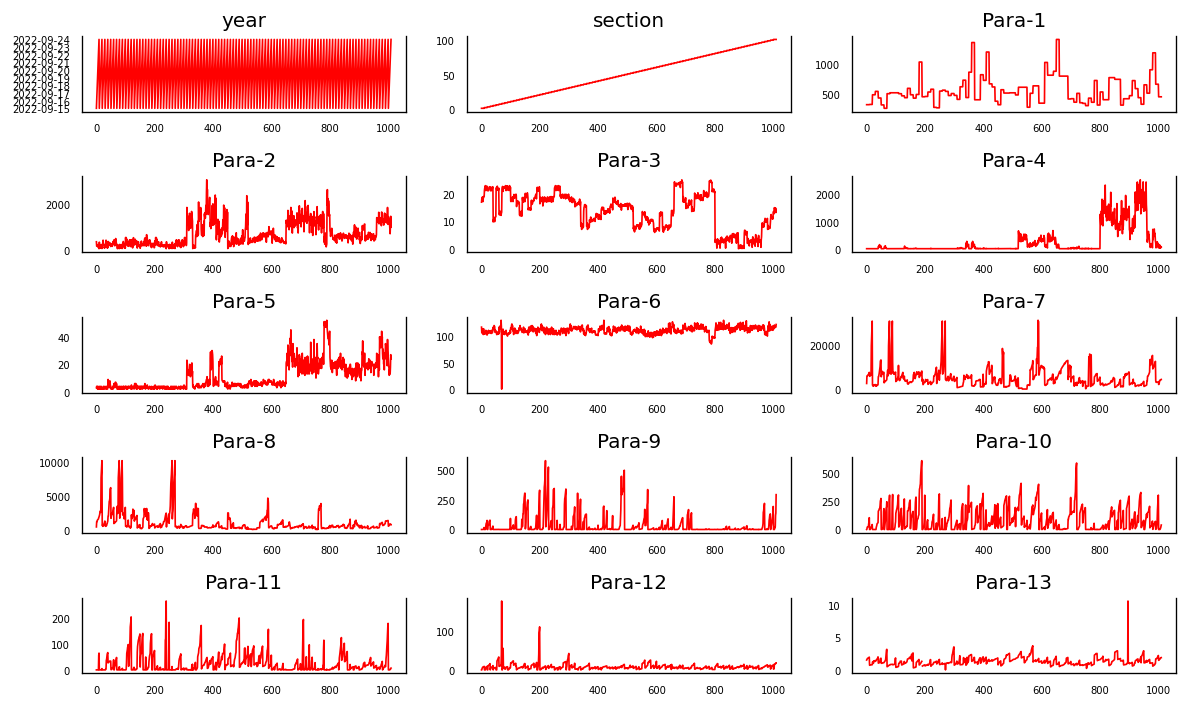

In [8]:
fig, axes = plt.subplots(nrows=5, ncols=3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_combined[df_combined.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df_combined.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

#**Dividing the data into different sections and applying time series forecasting over each section using FBprophet library**

In [46]:
dataf_final=pd.DataFrame(columns=['Section','ColumnName','Actual Value','Predicted Value','Predicted Value Upper Bound'])
dataf_final_rmse=pd.DataFrame(columns=['Section','RMSE','RMSE with upper bound predictions'])

In [47]:
def rmse(x,y):
  return np.sqrt(mean_squared_error(x, y))

In [48]:
startr=0
endr=10
while endr!=1020:
  df_section_1=df.iloc[startr:endr,1:]
  df_section_1['year'].astype(int)
  ind=startr
  for i in df_section_1['year']:
    df_section_1.at[ind,'year'] = date.today() + timedelta(days=i)
    ind+=1
  df_section_1.rename(columns={'year':'ds','Para-9':'y','Para-10':'y','Para-11':'y','Para-12':'y','Para-13':'y'},inplace=True)
  df_section_1_Para9=pd.concat([df_section_1.iloc[:9,:9],df_section_1.iloc[:9,9]],axis=1)
  df_section_1_Para10=pd.concat([df_section_1.iloc[:9,:9],df_section_1.iloc[:9,10]],axis=1)
  df_section_1_Para11=pd.concat([df_section_1.iloc[:9,:9],df_section_1.iloc[:9,11]],axis=1)
  df_section_1_Para12=pd.concat([df_section_1.iloc[:9,:9],df_section_1.iloc[:9,12]],axis=1)
  df_section_1_Para13=pd.concat([df_section_1.iloc[:9,:9],df_section_1.iloc[:9,13]],axis=1)
  # print(df_section_1)
  # print(df_section_1_Para12)
  # Model for Para-9
  model_pro1=Prophet(interval_width=0.95)
  model_pro1.add_regressor('Para-1')
  model_pro1.add_regressor('Para-2')
  model_pro1.add_regressor('Para-3')
  model_pro1.add_regressor('Para-4')
  model_pro1.add_regressor('Para-5')
  model_pro1.add_regressor('Para-6')
  model_pro1.add_regressor('Para-7')
  model_pro1.add_regressor('Para-8')
  model_pro1.fit(df_section_1_Para9)
  future1=df_section_1.iloc[8:10,:9]
  forecast1=model_pro1.predict(future1)
  # Model for Para-10
  model_pro2=Prophet(interval_width=0.95)
  model_pro2.add_regressor('Para-1')
  model_pro2.add_regressor('Para-2')
  model_pro2.add_regressor('Para-3')
  model_pro2.add_regressor('Para-4')
  model_pro2.add_regressor('Para-5')
  model_pro2.add_regressor('Para-6')
  model_pro2.add_regressor('Para-7')
  model_pro2.add_regressor('Para-8')
  model_pro2.fit(df_section_1_Para10)
  future2=df_section_1.iloc[8:10,:9]
  forecast2=model_pro2.predict(future2)
  # Model for Para-11
  model_pro3=Prophet(interval_width=0.95)
  model_pro3.add_regressor('Para-1')
  model_pro3.add_regressor('Para-2')
  model_pro3.add_regressor('Para-3')
  model_pro3.add_regressor('Para-4')
  model_pro3.add_regressor('Para-5')
  model_pro3.add_regressor('Para-6')
  model_pro3.add_regressor('Para-7')
  model_pro3.add_regressor('Para-8')
  model_pro3.fit(df_section_1_Para11)
  future3=df_section_1.iloc[8:10,:9]
  forecast3=model_pro3.predict(future3)
  # Model for Para-12
  model_pro4=Prophet(interval_width=0.95)
  model_pro4.add_regressor('Para-1')
  model_pro4.add_regressor('Para-2')
  model_pro4.add_regressor('Para-3')
  model_pro4.add_regressor('Para-4')
  model_pro4.add_regressor('Para-5')
  model_pro4.add_regressor('Para-6')
  model_pro4.add_regressor('Para-7')
  model_pro4.add_regressor('Para-8')
  model_pro4.fit(df_section_1_Para12)
  future4=df_section_1.iloc[8:10,:9]
  forecast4=model_pro4.predict(future4)
  # Model for Para-13
  model_pro5=Prophet(interval_width=0.95)
  model_pro5.add_regressor('Para-1')
  model_pro5.add_regressor('Para-2')
  model_pro5.add_regressor('Para-3')
  model_pro5.add_regressor('Para-4')
  model_pro5.add_regressor('Para-5')
  model_pro5.add_regressor('Para-6')
  model_pro5.add_regressor('Para-7')
  model_pro5.add_regressor('Para-8')
  model_pro5.fit(df_section_1_Para13)
  future5=df_section_1.iloc[8:10,:9]
  forecast5=model_pro5.predict(future5)
  act=[]
  pred=[]
  pred_upper=[]
  act.append(df_section_1.iloc[9,9])
  act.append(df_section_1.iloc[9,10])
  act.append(df_section_1.iloc[9,11])
  act.append(df_section_1.iloc[9,12])
  act.append(df_section_1.iloc[9,13])
  pred.append(forecast1['yhat'][1])
  pred.append(forecast2['yhat'][1])
  pred.append(forecast3['yhat'][1])
  pred.append(forecast4['yhat'][1])
  pred.append(forecast5['yhat'][1])
  pred_upper.append(forecast1['yhat_upper'][1])
  pred_upper.append(forecast2['yhat_upper'][1])
  pred_upper.append(forecast3['yhat_upper'][1])
  pred_upper.append(forecast4['yhat_upper'][1])
  pred_upper.append(forecast5['yhat_upper'][1])
  dataf_final.loc[len(dataf_final)]=[endr//10,'Para9',df_section_1.iloc[9,9],forecast1['yhat'][1],forecast1['yhat_upper'][1]]
  dataf_final.loc[len(dataf_final)]=[endr//10,'Para10',df_section_1.iloc[9,10],forecast2['yhat'][1],forecast2['yhat_upper'][1]]
  dataf_final.loc[len(dataf_final)]=[endr//10,'Para11',df_section_1.iloc[9,11],forecast3['yhat'][1],forecast3['yhat_upper'][1]]
  dataf_final.loc[len(dataf_final)]=[endr//10,'Para12',df_section_1.iloc[9,12],forecast4['yhat'][1],forecast4['yhat_upper'][1]]
  dataf_final.loc[len(dataf_final)]=[endr//10,'Para13',df_section_1.iloc[9,13],forecast5['yhat'][1],forecast5['yhat_upper'][1]]
  dataf_final_rmse.loc[len(dataf_final_rmse)]=[int(endr//10),rmse(act,pred),rmse(act,pred_upper)]
  startr+=10
  endr+=10

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disab

# **Table showing actual value and predicted value of parameters 9 to 13 for each and every section.**

In [49]:
dataf_final

,Section,ColumnName,Actual Value,Predicted Value,Predicted Value Upper Bound
0,1,Para9,16.800,2.505680,2.918806
1,1,Para10,105.000,53.584791,56.948988
2,1,Para11,65.000,23.432458,31.891878
3,1,Para12,9.000,7.777151,8.141235
4,1,Para13,1.960,1.919439,1.959225
...,...,...,...,...,...
500,101,Para9,293.000,152.884842,156.231733
501,101,Para10,39.800,32.387525,32.387528
502,101,Para11,7.000,5.695302,5.758193
503,101,Para12,18.000,21.148069,21.516201


# **Table showing RMSE for the predicted values in each section.**

In [50]:
dataf_final_rmse

,Section,RMSE,RMSE with upper bound predictions
0,1.0,30.256269,26.827122
1,2.0,14.211630,15.087056
2,3.0,13.370598,13.741664
3,4.0,15.523008,16.139238
4,5.0,8.630230,4.149357
...,...,...,...
96,97.0,19.808638,22.699341
97,98.0,36.238627,36.712060
98,99.0,155.767447,156.711577
99,100.0,88.792338,95.185352


# **Graph showing RMSE values for different section.**

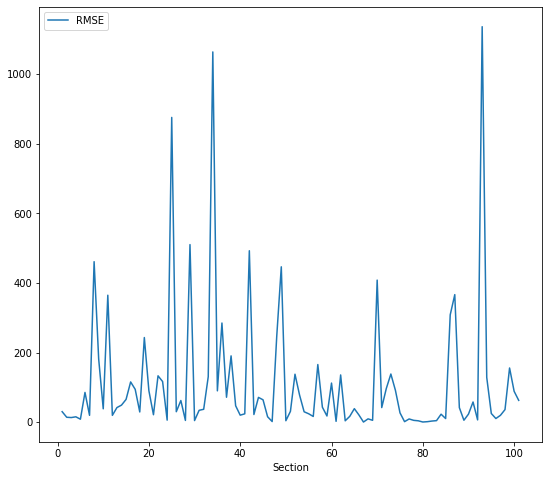

In [51]:
dataf_final_rmse.plot(x="Section", y="RMSE", figsize=(9, 8))

# **Graph showing RMSE values with upper bound prediction for different section.**

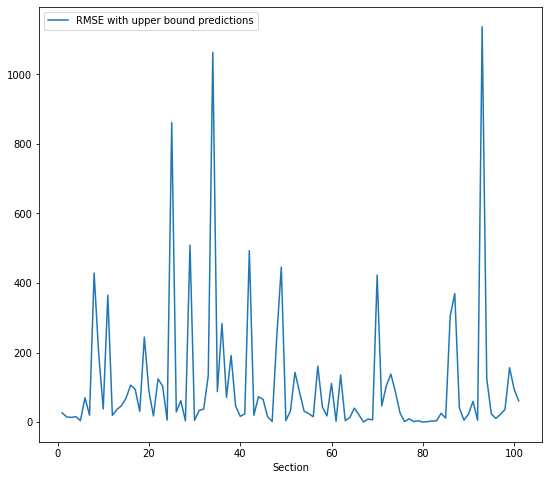

In [52]:
dataf_final_rmse.plot(x="Section", y="RMSE with upper bound predictions", figsize=(9, 8))

In [54]:
print('Average of all the RMSE is : ',np.mean(dataf_final_rmse['RMSE']))

Average of all the RMSE is :  112.29614286531394


In [55]:
print('Average of all the RMSE values with upper bound prediction is : ',np.mean(dataf_final_rmse['RMSE with upper bound predictions']))

Average of all the RMSE values with upper bound prediction is :  111.781509545047


___
The average value of error(RMSE) encountered while predicting the values for parameters:9-13 is ~ 111.7815. I have use the Facebooks's Prophet library to achieve the above mentioned error score.
___